<a href="https://colab.research.google.com/github/dariusdaking/learningrandomness/blob/master/learning_randomness_darius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [74]:
# Number of tries for the experiment
expnumb = 2003
tries= np.array([],int)
chosens = np.array([],int)
smallers = np.array([],int)
biggers = np.array([],int)
two_d_arr = np.array([4,expnumb])


percent_training = 0.9
num_training = int(expnumb)
num_test = expnumb - num_training

for x in range(1,expnumb): 
  
    chosen = random.randint(1,1000)
    start = 500
    guess = np.array([1,1000,start])
    sm = 0
    bg = 0
    #number of guesses  
    for i in range(2,101):
        try:
            if guess[i] > chosen:        

                sm += 1
                hehe = np.sort(guess)
                #print('smaller', guess, hehe, chosen, i)

                last = np.where(hehe == guess[i])
                if hehe[last[0][0]-1]+1 != hehe[last[0][0]]:

                    guess = np.append(hehe, random.randint(hehe[last[0][0]-1]+1, hehe[last[0][0]]))
            elif guess[i] < chosen:

                bg +=1
                hehe = np.sort(guess)
                #print('bigger', guess, hehe, chosen, i)

                last = np.where(hehe == guess[i])
                if hehe[last[0][0]]+1 != hehe[last[0][0]+1]:

                    guess = np.append(hehe, random.randint(hehe[last[0][0]]+1, hehe[last[0][0]+1]))
            elif guess[i] == chosen:
                #print(" )

                tries = np.append(tries, i)
                chosens = np.append(chosens, chosen)
                smallers = np.append(smallers, sm)
                biggers = np.append(biggers,bg)
                break
        except:
            continue
        
      
        
        
          
feat_d_arr = np.vstack([[smallers[0:expnumb,]],[biggers[0:expnumb,]],[tries[0:expnumb,]], [chosens[0:expnumb,]]])
# feat_d_arr = np.transpose(feat_d_arr)
print("""Experiment ran for %s times the max number of guesses is %s and the min is  %s, 
below is the four Dimensional array of data """ % (expnumb, np.amax(tries) , np.amin(tries)))
print(feat_d_arr.shape)

x_scaler = StandardScaler()
y_scaler = StandardScaler()
x= feat_d_arr[0:3,0:1800].reshape(1800,3)
y= feat_d_arr[3,0:1800].reshape(1800,1)


Model = MLPRegressor(hidden_layer_sizes=(10,5,1 ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

Model.fit(x,y)

Experiment ran for 2003 times the max number of guesses is 31 and the min is  2, 
below is the four Dimensional array of data 
(4, 1999)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 1), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

The Neural Network Prediction is [[-272.36007666 -266.78507132 -277.42181047 ... -267.05596596
  -259.7175724  -117.27353566]
 [ 149.63992334  155.21492868  144.57818953 ...  154.94403404
   162.2824276   304.72646434]
 [ 107.63992334  113.21492868  102.57818953 ...  112.94403404
   120.2824276   262.72646434]
 ...
 [-319.36007666 -313.78507132 -324.42181047 ... -314.05596596
  -306.7175724  -164.27353566]
 [ 232.63992334  238.21492868  227.57818953 ...  237.94403404
   245.2824276   387.72646434]
 [-285.36007666 -279.78507132 -290.42181047 ... -280.05596596
  -272.7175724  -130.27353566]]
      "and the real number is


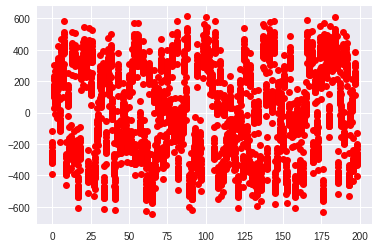

In [75]:

shaper = int((int(feat_d_arr[1,].shape[0])-1800))
pred = Model.predict(feat_d_arr[0:3,1800:2000].reshape(shaper,3))
real = feat_d_arr[3,1800:2000].reshape(shaper,1)
                                  
                                  
diff= real - pred

print("""The Neural Network Prediction is %s
      "and the real number is"""  % ( diff  ))
      
plt.plot(diff, 'ro')

plt.show()

In [0]:
#predi = feat_d_arr[0:3,1800:1980].reshape(60,3,3,3)
p = feat_d_arr[0:3,1800:1980]
p =p.transpose()
predi = p.reshape(20,3,3,3)

In [0]:
y_ker = y.reshape(200,3,3, 1)
x_ker = x.reshape(200,3,3, 3)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(64, input_shape=(3,3,3)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1),
    Activation('relu')
    
])
model.compile(optimizer='rmsprop',
              loss='mse')
model.fit(x_ker, y_ker, epochs=10, batch_size=100)

tensorboard = TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
score = model.evaluate(x_ker, y_ker, batch_size=128)


Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 327984.1562
Epoch 2/10
200/200 [==============================] - 0s 44us/step - loss: 326754.9062
Epoch 3/10
200/200 [==============================] - 0s 45us/step - loss: 325901.7031
Epoch 4/10
200/200 [==============================] - 0s 48us/step - loss: 325148.3125
Epoch 5/10
200/200 [==============================] - 0s 54us/step - loss: 324415.6094
Epoch 6/10
200/200 [==============================] - 0s 66us/step - loss: 323656.2188
Epoch 7/10
200/200 [==============================] - 0s 45us/step - loss: 322857.0938
Epoch 8/10
200/200 [==============================] - 0s 44us/step - loss: 322010.0781
Epoch 9/10
200/200 [==============================] - 0s 56us/step - loss: 321117.2344
Epoch 10/10
200/200 [==============================] - 0s 1ms/step


In [128]:
plpred

array([10.160701 , 13.583417 , 13.666638 ,  8.744382 , 11.787038 ,
       11.756272 , 13.769288 ,  9.243434 , 16.181368 ,  8.656983 ,
        9.603055 ,  9.546206 , 15.078551 ,  7.027304 ,  4.602878 ,
       13.666638 ,  7.0515914,  9.446606 , 14.217935 ,  8.656983 ],
      dtype=float32)

In [0]:
pl =predi[0:20,0,0,0]
plpred = predic[0:20,0,0,0]


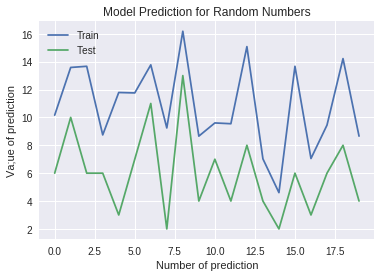

In [130]:
predic= model.predict_on_batch(predi)

plt.plot(plpred)
plt.plot(pl)
plt.title('Model Prediction for Random Numbers')
plt.ylabel('Va;ue of prediction')
plt.xlabel('Number of prediction')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()